# FINE: Fisher Information Non-parametric Embedding: 
https://arxiv.org/pdf/0802.2050.pdf

- Gabriel Jurado

## Introduction

   In machine learning, one often deals with the problems of clustering, classification, and visualization of high-dimensional data when no straightforward Euclidean representation exists. These problems characterize the various approaches to data inference, which can be thought of as a method of gaining knowledge by constructing models that make decisions or predictions based on the observed data. A common theme amongst the mentioned problems is that the model from which the data is generated is typically unknown. Having no information about the distributions that generate the data or the parameters of the probability density function that model it, make the task of data inference a formidable one. 
   
   This notebook presents a brief overview of a framework developed to handle such problems. In particular, we focus on case where the data is high-dimensional and no lower-dimensional Euclidean manifold gives a sufficient representation. This is problematic because, in many cases a lower-dimensional statistical manifold can be utilized to asses various learning tasks on the data or emphasize some, otherwise hidden, relationship among the data variables. The framework presented is known as Fisher Information Non-parametric Embedding (FINE), and is composed of three main components: 

1. a dimensionality reduction procedure to obtain a low-dimensional Euclidean embedding of the original high-dimensional data set for the dual purposes of classification and vizualization,   
2. a geodesic approximation of the Fisher information distance as a metric for evaluating similarities between data sets, 
3. and a characterization of data sets in terms of a non-parametric statistical model. 

Using FINE allows for the analysis of high-dimensional data, through a non-linear embeding into a low-dimensional space, using information geometry, not Euclidean geometry. This analysis requires no explicit assumptions about the model, only that the given data is a realization from an unknown model with some natural parametrization.

## Information Geometry Review

Using tools and methods from differential geometry, information geometry is the study of geometrical structures on manifolds induced by probability distributions. This allows the treatment of probability distributions as geometric structures in a Riemannian space. 

### Differential Manifolds

A manifold $M$ can be thought of as a set of points with a coordinate system. The points can be constructed in a variety of forms, such as Euclidean coordinates, a linear system, images, or probability distributions. Refering to the coordinate system on $M$ as $\Psi: M \rightarrow \Re^d$. If $\Psi$ has $M$ as its domain it becomes a global coordinate system and $\Psi$ becomes a one-to-one mapping into $\Re^d$ for all points in $M$. In addition, a manifold is said to be smooth when $\Psi$ is infinitely differentiable over the entire domain. 

In the case where elements of the set $M$ are given by probability distributions, our manifold becomes a statistical manifold. A probability distribution function (PDF) on a set $\chi$ is defined as a function $p:\chi \rightarrow \Re$ in which

$$ p(x) \geq 0; \ \forall \ x \in \chi $$
$$ \int p(x) \ dx =1 $$

Given an $M$ that is a family of PDFs on the set $\chi$, for which each element of $M$ is a PDF that can be parametrized by $\theta$, where $\theta = [\theta^1,...,\theta^n]$, such that

$$ M = \{p(x|\theta) \ | \ \theta \in \Theta \subseteq \Re^d  \}, $$

then $M$ is known as a statistical manifold when the parametrization $\theta$ is also a coordinate of $M$.

### Distances on Manifolds

Now, supppose we wish to define a measure of distance on our maniold $M$. In Euclidean space, the distance between two points is defined as the length of a straight line between the points. However, on a manifold, a distance becomes the trace of the shortest path between two points along the manifold, not necessarily a straight line. This path is called the geodesic and its length defines the distance. __In information geometry, the distance between two points on the manifold is analogous to the difference in information between them, and is defined by the Fisher information metric__. 

The Fisher information measures the amount of information a random variable $X$ contains in reference to an unknown parameter $\theta$. For the single parameter case we have

$$ I(\theta)= \Big\langle \Big( \dfrac{\partial}{\partial \theta} \ log \ f(X,\theta) \Big)^2  \Big\rangle $$  

and if the condition $\int \dfrac{\partial^2}{\partial\theta^2}f(X,\theta)dX=0$ is satisfied we re-write as

$$ I(\theta)= -\Big\langle \dfrac{\partial^2}{\partial \theta^2} \ log \ f(X,\theta) \Big\rangle $$  

Generalizing to the case of multiple parameters yields the Fisher information matrix $[I(\theta)]$

$$ I_{ij}=\int f(X,\theta) \dfrac{\partial log f(X,\theta)}{\partial \theta^i}\dfrac{\partial log f(X,\theta)}{\partial \theta^j}dX$$

For a parametric family of probability distributions, it is possible to define a Riemannian metric using the Fisher information matrix, this metric is known as the information metric. Once the information metric is found, the information distance between two distributions $p(x,\theta_1)$ and $p(x,\theta_2)$, can be calculated. 
For a single parameter family this distance is given by

$$ D_F(\theta_1,\theta_2) = \int_{\theta_1}^{\theta_2}I(\theta)^{1/2}d\theta $$

where $\theta_1$ and $\theta_2$ are parameter values corresponding to $p(x,\theta_1)$ and $p(x,\theta_2)$, respectively. 

Extending to the multi-paramter case we obtain:

\begin{equation}
D_{F}(\theta_1,\theta_2) = \text{min}_{\theta_1,\theta_2} \int_0^1 \sqrt{\bigg( \dfrac{d\theta}{d\beta} \bigg)^TI(\theta)\bigg( \dfrac{d\theta}{d\beta} \bigg)}d\beta
\end{equation}

where $\theta(0)=\theta_1=0$ and $\theta(1)=\theta_2=1$



## Formulation of the Problem

A key property of the Fisher information metric is that it is independent of the parametrization of the manifold. However, calculating the Fisher information metric requires knowledge of the parametrization. Thus, we assume the collection of density functions lie on a manifold that can be described by some natural parametrization. 

For example, given $P = \{ p_1,...,p_n \}$, where $p_i \in M$ is a probability density function and $M$ is a manifold embedded in $S$, the simplex of densities in $L_1$, our goal is to find an approximation for the geodesic distance between two points on $M$ using only the information available in $P$.

Can we find an approximation function $G$, which yields

$$ \hat{D}_F(p_i,p_j) = G(p_i,p_j;P), $$ such that $$\hat{D}_F(p_i,p_j)\rightarrow D_F(p_i,p_j) $$ as $n\rightarrow \infty$?

This problem is similar to classic problems in manifold learning and dimensional reduction, where only a set of points on the manifold are available for analysis. We can therefore use these manifold techniques to construct a low-dimensional embedding of the set of points. This allows for effective visualization of the manifold and, in additon, by reducing the affect of the $\textit{curse of dimensionality}$, it allows clustering and classificaiton to be preformed on the family of ditributions that lie on the manifold.

Turns out there is a family of divergences and distances that can be used to approximate the Fisher distance, in particular, the $\alpha$-divergence. 

The $\alpha$-divergence is a basis for many important divergence metrics, and gives rise to the well known, Hellinger distance, the Kullback-Leibler divergence, and the Renyi-Alpha entropy.

The $\alpha$-divergence can be evaluated as 

$$ D^{(\alpha)}(p\Vert q) = \dfrac{4}{1-\alpha^2}\Big(1-\int p(x)^{(1-\alpha)/2}q(x)^{(1+\alpha)/2}dx  \Big)  \ \text{for} \ \alpha \neq 1 $$

and 

$$ D^{(-1)}(p\Vert q) = D^{(1)}(p\Vert q) = \int p(x) \ log \dfrac{p(x)}{q(x)} $$

Kullback-Leibler Divergence is defined as 

$$ KL(p\Vert q) \ =\int p(x) \ log\dfrac{p(x)}{q(x)} $$ 

which is equal to $ D^{(-1)} $

As $p\rightarrow q$ the KL-divergence approximates the Fisher information distance as

$$ \sqrt{2KL(p\Vert q)}\rightarrow D_F(p,q) $$

Another important result of the $\alpha$-divergence is the evaluation with $\alpha = 0$:

$$ D^{(0)}(p\Vert q) = 2 \int \Big(\sqrt{p(x)} - \sqrt{q(x)}\Big)^2 dx$$ 

Which is closely related to another approximation of the Fisher information distance, namely, the Hellinger Distance:

$$ D_H = \sqrt{\dfrac{1}{2}D^{(0)}} $$

and as $p\rightarrow q$ the Hellinger distance approximates the Fisher information distance as

$$ 2D_H(p\Vert q)\rightarrow D_F(p,q) $$

There are other metrics with approximate the Fisher information distance, such as cosine distance. When dealing with multinomial distributions, the approximation 

$$  D_C(p,q) = 2arcos  \int   \sqrt{p\cdot q} \rightarrow D_F(p,q)  $$

is the natural metric on the sphere.

The above metrics allow us to approximate the Fisher information distance between $p_1$ and $p_2$, granted we satisfy the condition that $p_1\rightarrow p_2$.

However, what happens in the case where $p_1$ and $p_2$ do not lie close together? 

In this case the above approximations become weak and break down. 

Luckily, a good approximation can still be achieved if the manifold is densely sampled between the two end points. By defining the path between $p_1$ and $p_2$ as a series of connected segments and summing the length of those segments, we approximate the distance of the geodesic, which is the shortest path along the manifold. 


![geodesic](/tree/Pictures/geodesic.png)

Specifically, given the set of $n$ PDFs parameterized by $P_θ = {θ_1,... ,θ_n}$, the Fisher information distance between $p_1$ and $p_2$ can be estimated as: 

$$ G(p_1,p_2;P) = min_{m,P}\sum_{i=1}^m \hat{D}_F(p_i,p_{i+1}),  \ p_i \rightarrow p_{i+1} \forall i $$ 

where $P  = \{p_1,...,p_n \}$ is the available collections of PDF's on the manifold. As the manifold is more densely sampled (perhaps uniformly in mean and variance parameters...), the approximation converges to the true Fisher information distance.

![fisherapprox](/tree/Pictures/fisherapprox.png)

### Dimensionality reduction

Given a matrix of dissimilarities between entities, many algorithms have been developed to find a low-dimensional embedding of the original data $\Psi: M \rightarrow R^d$. These techniques have been classified as
a group of methods called Multi-Dimensional Scaling (MDS). There are supervised methods, which are
generally used for classification purposes, and unsupervised methods, which are often used for clustering
and manifold learning. Using these MDS methods allows us to find a single low-dimensional coordinate
representation of each high-dimensional, large sample, data set.

Classical MDS (cMDS) takes a matrix of dissimilarities and
embeds each point into a Euclidean space. This is performed by first centering the dissimilarities about the
origin, then calculating the eigenvalue decomposition of the centered matrix. This unsupervised method
permits the calculation of the low-dimensional embedding coordinates which reveal any natural separation
or clustering of the data.

Almost any 2-d Manifold (surface) can be embedded into 3-d in a way that preserves the metric. In the case of the 2-d surface defined by the (μ,σ) of the Gaussian distribution, the embedding into 3-d is the pseudo-sphere I mentioned above. Can we use some numerical algorithms to 'discover' an embedding of a 2-d Euclidean manifold into a 3-d Fisher information manifold without ever explicitly figuring out the mapping (μ,σ)→R3? Let's find out!

We can use the numerical technique of Multidimensional scaling (MDS) to find an embedding that preserves those distances. Luckily, scikit-learn has a nice set of manifold learning algorithms including an MDS implementation. This algorithm only needs to know the distances between pairs of points, and then it will do its best to embed in whatever number of dimensions you ask. Let's see how it does with the Gaussian problem.

### Example: Geodesic distance between univariate Gaussian densities via Fisher information metric

Consider the family of univariate Gaussian distributions $P=\{p_1,...p_n \}$ where 

$$ p_i(x) = \dfrac{1}{\sqrt{2\pi \sigma_i^2}}exp[-(x-\mu_i)^2/2\sigma_i^2)] $$

We parametrize the family of distributions by $\theta = (\mu/\sqrt{2},\sigma)$, and using the above expression for $[I(\theta)]$, calculate the Fisher information matrix;


$$[I(\theta)]=
  \begin{pmatrix}
    \dfrac{2}{\sigma^2} & 0 \\
    0 & \dfrac{2}{\sigma^2}
  \end{pmatrix}$$

Recall that we defined the distance between two points on the manifold as the minimum length between all paths connecting the two points. Using the inner product associated with the Fisher information matrix

$$ \langle \textbf{u}, \textbf{v}\rangle_F = \textbf{u}^T[I(\theta)]\textbf{v} $$

we define the length of path $P$ between two points parametrized by $\theta_1$ and $\theta_2$ on the manifold $M$ as
 
$$ \Vert\theta_1-\theta_2\Vert=\sqrt{\langle \theta_1-\theta_2, \theta_1-\theta_2\rangle_F} $$

Using the parametrization  $\theta(t)$ such that $\theta(0)=\theta_1$ and $\theta(1)=\theta_2$ we obtain the length of $P$ as 

$$ \Vert \theta_1-\theta_2\Vert_P=\int_0^1\sqrt{\Big(\dfrac{d}{dt}\theta(t)\Big)^TI(\theta(t))\Big(\dfrac{d}{dt}\theta(t)\Big)}dt $$ 

Using this we are able to define the distance between points $p_1=p(x,\theta_1)$ and $p_2=p(x,\theta_2)$ as the minimum of all path lengths defined as above

$$ D_F(p_1,p_2) = min_{\theta(t)}\sqrt{2}\int_0^1\sqrt{\dfrac{\dot{\mu}^2+\sqrt{2}\dot{\sigma}^2}{\sigma(t)^2}}dt$$

where $\dot{\mu}=\dfrac{d}{dt}\mu(t)$ and $\dot{\sigma}=\dfrac{d}{dt}\sigma(t)$.

By changing variables and parametrizing $\sigma$ as a function of $\mu$ we obtain the closed-form expression for the Fisher information distance 

$$ D_F = \sqrt{2}log\dfrac{\Vert \Big(\mu_1,\sqrt{2}\sigma_1\Big)-\Big(\mu_2,-\sqrt{2}\sigma_2\Big) \Vert+\Vert \Big(\mu_1,\sqrt{2}\sigma_1\Big)\Big(\mu_2,\sqrt{2}\sigma_2\Big) \Vert}{\Vert \Big(\mu_1,\sqrt{2}\sigma_1\Big)-\Big(\mu_2,-\sqrt{2}\sigma_2\Big) \Vert-\Vert \Big(\mu_1,\sqrt{2}\sigma_1\Big)-\Big(\mu_2,\sqrt{2}\sigma_2\Big) \Vert} $$

In the case of the Gaussian distribution, the 3-dimensional embedding of the Fisher information metric defines a surface of constant negative curvature. The sphere is the surface of constant positive curvature, so some call this surface of constant negative curvature the __pseudo-sphere__, which looks like this




![Pseudo-sphere](/tree/Pseudosphere_700.png)

Now that we have the explicit closed form for the Fisher information distance for a Gaussian distribution, let's create a 2-dimensional space defined by the Gaussian parameters $(\mu, \sigma)$ and see if we can "learn" the shape of the embedding in 3-dimensions and a metric preserving embedding in 2-dimensions.

![code](/tree/Pictures/FINEalgorithm.png)

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

# Next line to silence pyflakes.
Axes3D

Automatically created module for IPython interactive environment


mpl_toolkits.mplot3d.axes3d.Axes3D

Now let's make a grid in the (μ,σ) plane that is $n \times n$ samples

In [10]:
#make some random samples in 2d
n_samples = 20
seed = np.random.RandomState(seed=3)

#create a set of Gaussians in a grid of mean (-1.5,1.5) and standard devaition (0.2,5)
gridMuSigma=[]
for i in np.linspace(-1.5,1.5,n_samples):
    for j in np.linspace(.2,5,n_samples):
        gridMuSigma.append([i,j])
gridMuSigma=np.array(gridMuSigma)

Now let's code up that handy-dandy distance measure (this would be a big numerical project for an arbitrary metric $g_{ij}(α⃗)$ -- let's takle that later.)

In [11]:

#use 2-d Gaussian information metric for distances#use 2-d Gaussian informatio 
# see equation 7 from http://arxiv.org/abs/0802.2050 ("FINE" paper)
def getDistance(x,y):
    #going to define a measure here
    #print 'in getSim', x, y
    aa = x[0]-y[0]
    ab = x[1]+y[1]
    bb = x[1]-y[1]
    num = np.sqrt((aa**2+ab**2))+np.sqrt((aa**2+bb**2))
    den = np.sqrt((aa**2+ab**2))-np.sqrt((aa**2+bb**2))
    ret = np.log(num/den)
    return ret

Now let's loop through all the pairs of points and calculate the distance between them. For some reason this is referred to as "dissimilarity" in a lot of MDS literature.

In [12]:
# Create the array of "dissimilarities" (distances) between points
tempSim=[]
for x in gridMuSigma:
    temp = []
    for y in gridMuSigma:
        temp.append(getDistance(x,y))
    tempSim.append(temp)
distances=np.array(tempSim)

And now we can use scikit-learn's MDS implementation to embed these points in 3d and 2d so that the euclidean distance between points in the embedding corresponds to the Fisher information distance we calculated above. So even though we start with a 2d grid, the 2d embeddign will not look the same b/c the grid is not uniformly spaced in terms of the information distance.

In [13]:
#make 3d embedding 
mds = manifold.MDS(n_components=3, metric=True, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
embed3d = mds.fit(distances).embedding_

#make 2d embedding
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
embed2d = mds2.fit(distances).embedding_

Ok, the hard work is done, now let's make some plots. Let's color each point so we can see the correspondence. The colors will mainly stripe along a constant mean (as in all green points will correspond to a mean of ~0).

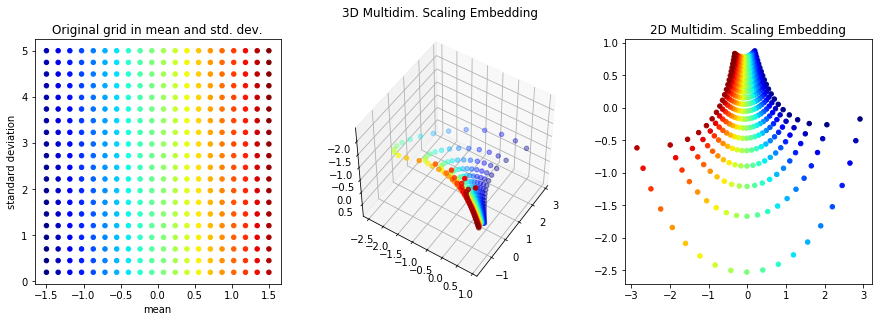

In [14]:
#Setup plots
fig = plt.figure(figsize=(5*3,4.5))

# choose a different color for each point
colors = plt.cm.jet(np.linspace(0, 1, len(gridMuSigma)))

#make original grid plot
gridsubpl = fig.add_subplot(131)
gridsubpl.scatter(gridMuSigma[:, 0], gridMuSigma[:, 1], s=20, c=colors)
gridsubpl.set_xlabel('mean')
gridsubpl.set_ylabel('standard deviation')
plt.title('Original grid in mean and std. dev.')
plt.axis('tight')

# plot 3d embedding
#since it is a surface of constant negative curvature (hyperbolic geometry)
#expect it to look like the pseudo-sphere
#http://mathworld.wolfram.com/Pseudosphere.html
subpl = fig.add_subplot(132,projection='3d')
subpl.scatter(embed3d[:, 0], embed3d[:, 1], embed3d[:, 2],s=20, c=colors)
subpl.view_init(42, 101) #looks good when njobs=-1
subpl.view_init(-130,-33)#looks good when njobs=1

plt.suptitle('3D Multidim. Scaling Embedding')
plt.axis('tight')

# plot 2d embedding
subpl2 = fig.add_subplot(133)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1],s=20, c=colors)
plt.title('2D Multidim. Scaling Embedding')
plt.axis('tight')

plt.show()

Wow! Super cool! That looks like the pseudo-sphere!

Well.... it looks like half of the pseudo-sphere. 

Which makes sense because as the means get further apart, they will never wrap around and have distributions that seem similar.

The 2d embedding looks interesting too, -- in fact, this image is Fig 5 of the FINE paper(http://arxiv.org/abs/0802.2050) I mentioned above. I'm not quite sure why those authors never made the 3d embedding.

Eventually, what I'd like to do is create some general purpose code that allows me to make these embeddings to visualize the surface based on an arbitrary Fisher information metric $g_{ij}(α⃗)$. That is going to take some more work, because calculating the distance between points is a bit involved. I am also interested in introducing dynamics into the analysis and studying the inverse problem. In other words, given a family of metrics obeying a partial differential equation, like an Euler-Lagrange PDE, that is generated by extremizing a functional $J[g^{\mu \nu}(\theta^i)]$, can the probability density function corresponding to the metrics be genrerated? 

Is there a set of differential equations for the metric whose solution gives the geodesic between two points?

Can we constrain the equations to minimize for the density of points sampled? 

